In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
A = np.eye(5); A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

In [5]:
X = data[:, 0]
y = data[:, 1]

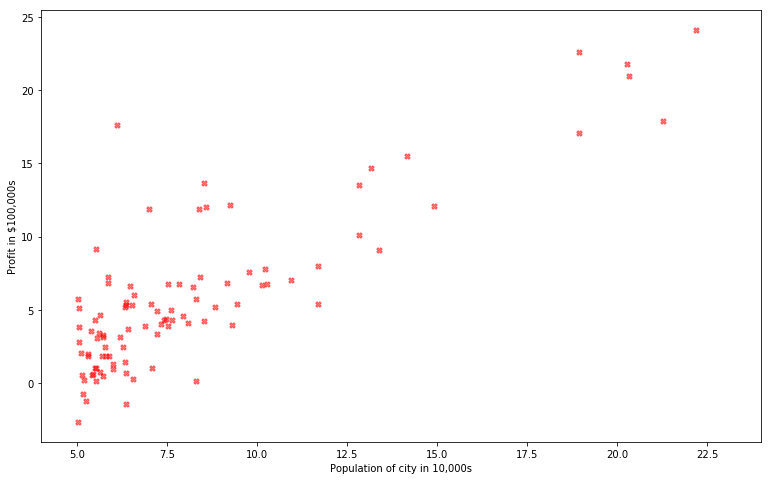

In [6]:
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(X, y, marker='X', c='red', linewidths=1, alpha=0.5, s=30)
axes.set_xlabel('Population of city in 10,000s')
axes.set_ylabel('Profit in $100,000s')
axes.set_xlim(4, 24);

In [7]:
m = X.shape[0]

In [8]:
theta = np.zeros((2, 1))

In [9]:
# X = np.hstack((np.ones((m, 1)), data[:, 0].reshape(m, 1)))
y = np.c_[data[:, 1]]
X = np.c_[(np.ones(m), data[:, 0])]

In [10]:
iterations = 1500
alpha = 0.01

In [11]:
def compute_cost(X, y, theta):
    m = len(y)
    J = 0
    J = (1/ (2*m)) * np.sum(np.power((X @ theta - y), 2))
    return J

In [12]:
compute_cost(X, y, theta)

32.072733877455676

In [13]:
compute_cost(X, y, np.array([[-1], [2]]))

54.24245508201238

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        h = X @ theta
        delta = (1/m) * (X.T @ (h - y))
        theta = theta - alpha * delta
        J_history[iter] = compute_cost(X, y, theta)
    return (theta, J_history)

In [15]:
theta, cost_J = gradient_descent(X, y, theta, alpha, iterations); print(theta)

[[-3.63029144]
 [ 1.16636235]]


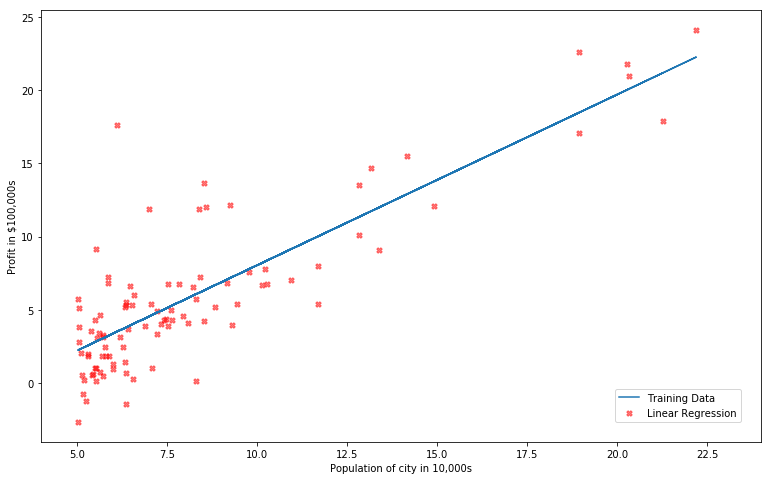

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X[:, 1], y, marker='X', c='red', linewidths=1, alpha=0.5, s=30)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $100,000s')
ax.set_xlim(4, 24)
ax.plot(X[:, 1], X @ theta)
ax.legend(('Training Data', 'Linear Regression'), loc=4, borderaxespad=2)

In [32]:
predict1 = [1, 3.5]  @ theta
print(f'For population = 35,000, we predict a profit of %f\n{predict1*10000}');
predict2 = [1, 7] @ theta
print(f'For population = 70,000, we predict a profit of %f\n{predict2*10000}');

For population = 35,000, we predict a profit of %f
[4519.7678677]
For population = 70,000, we predict a profit of %f
[45342.45012945]


In [40]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [41]:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [84]:
for (i, j), v in np.ndenumerate(J_vals):
    t = np.vstack((theta0_vals[i], theat1_vals[j]))
    J_vals[i, j] = compute_cost(X, y, t)

In [85]:
from mpl_toolkits.mplot3d import Axes3D

In [86]:
xx, yy = np.meshgrid(theta0_vals, theta1_vals, indexing='xy')

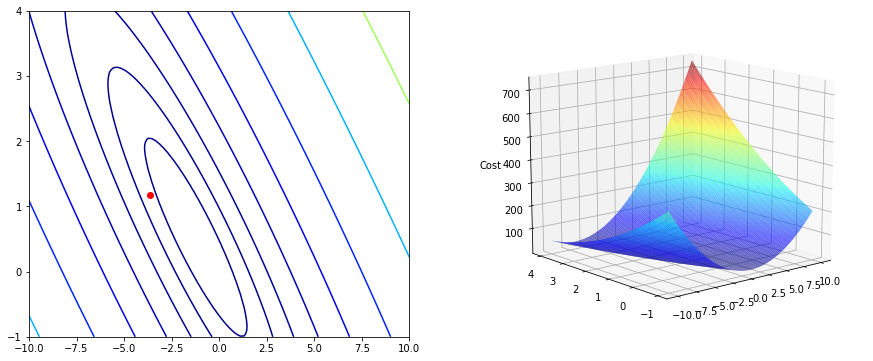

In [110]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(122, projection='3d')
ax2 = fig.add_subplot(121)
ax1.plot_surface(xx, yy, J_vals,rstride=1, cstride=2, alpha=0.6, cmap=plt.cm.jet)
ax1.set_zlabel('Cost')
ax1.set_zlim(J_vals.min(),J_vals.max())
ax1.view_init(elev=15, azim=230)

ax2.contour(xx, yy, J_vals, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax2.set_ylim(-1, 4)
ax2.scatter(theta[0],theta[1], c='r')

In [79]:
??plt.figure.add_subplot.plot_surface

Object `plt.figure.add_subplot.plot_surface` not found.


In [72]:
theta0_vals.shape

(100,)